# Regression for the Population data

## Logistic regression

The optimal choice of parameters for the logistic function, given the sample data, is [1.23447949e+07 2.05000000e+03 9.79466576e+01] (ti, tau, Co, C1).


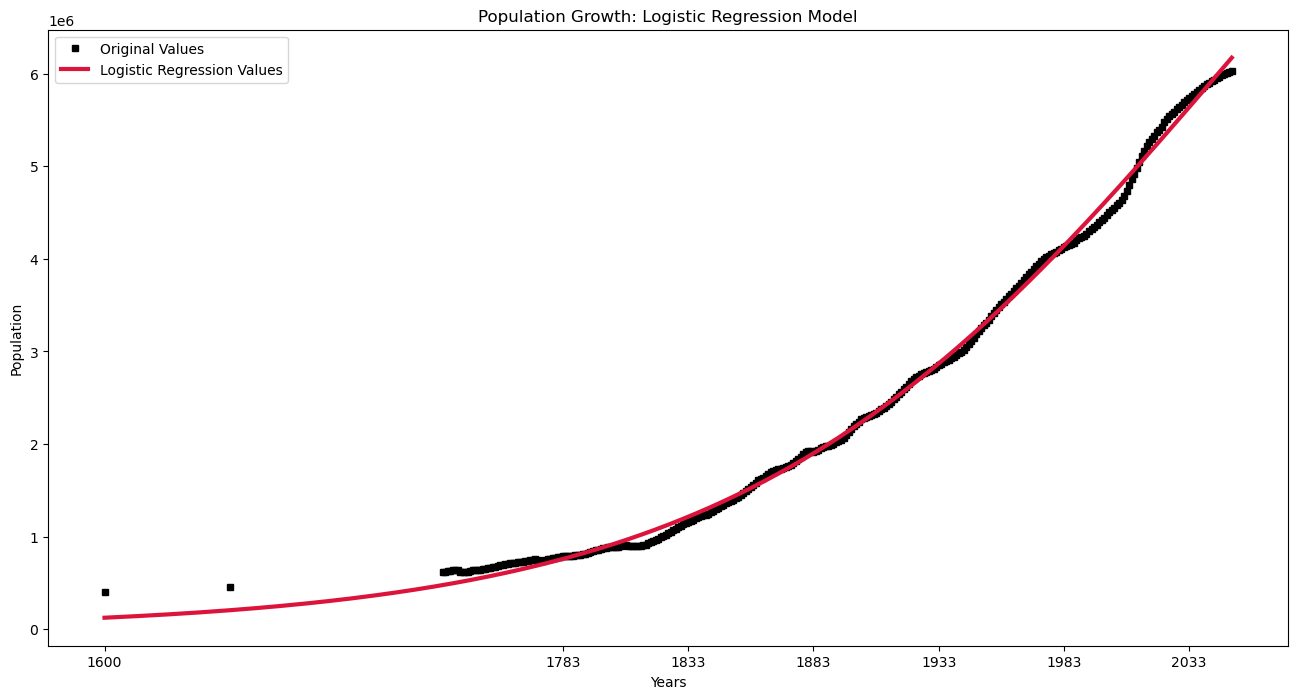

In [3]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

file = 'Norway_population (1600-2050).xlsx'  
data = pd.read_excel(file)

# Define the logistic function
def logistic(x, C, t, tau):
    return C / (1 + np.exp(-(x - t) / tau))

# Extracting the inputs (years) and outputs (population) from the data
reg_years = data['Year'].values
reg_values = data['Population'].values

# Set the range for prediction years, you can adjust this range as needed
reg_predictor_years = np.linspace(min(reg_years), 2050, 500)

# Fit the logistic model to the data
# Adjust the bounds
initial_guess = [1.5 * max(reg_values), np.median(reg_years), (max(reg_years) - min(reg_years)) / 20]

bounds = ([0, min(reg_years), 1], [3 * max(reg_values), 2050, 100])

popt, pcov = curve_fit(logistic, reg_years, reg_values, p0=initial_guess, bounds=bounds)
# Predict values
pred_outputs = logistic(reg_predictor_years, *popt)
# Output the parameters of the logistic function
print(f'The optimal choice of parameters for the logistic function, given the sample data, is {popt} (ti, tau, Co, C1).')

# Plotting the results
fig = plt.figure(figsize=(16, 8))
plt.plot(reg_years, reg_values, 's', color='black', markersize=5, label='Original Values')
plt.plot(reg_predictor_years, pred_outputs, color='crimson', lw=3, label='Logistic Regression Values')
plt.legend(loc='best')
plt.xticks(ticks=np.rint(reg_years[:len(reg_predictor_years):int(len(reg_predictor_years)/10)]))
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Population Growth: Logistic Regression Model')
plt.show()


## Polynomial regression

The polynomial our fit created is: 
            4         3        2
-0.0002339 x + 1.763 x - 4926 x + 6.056e+06 x - 2.769e+09.


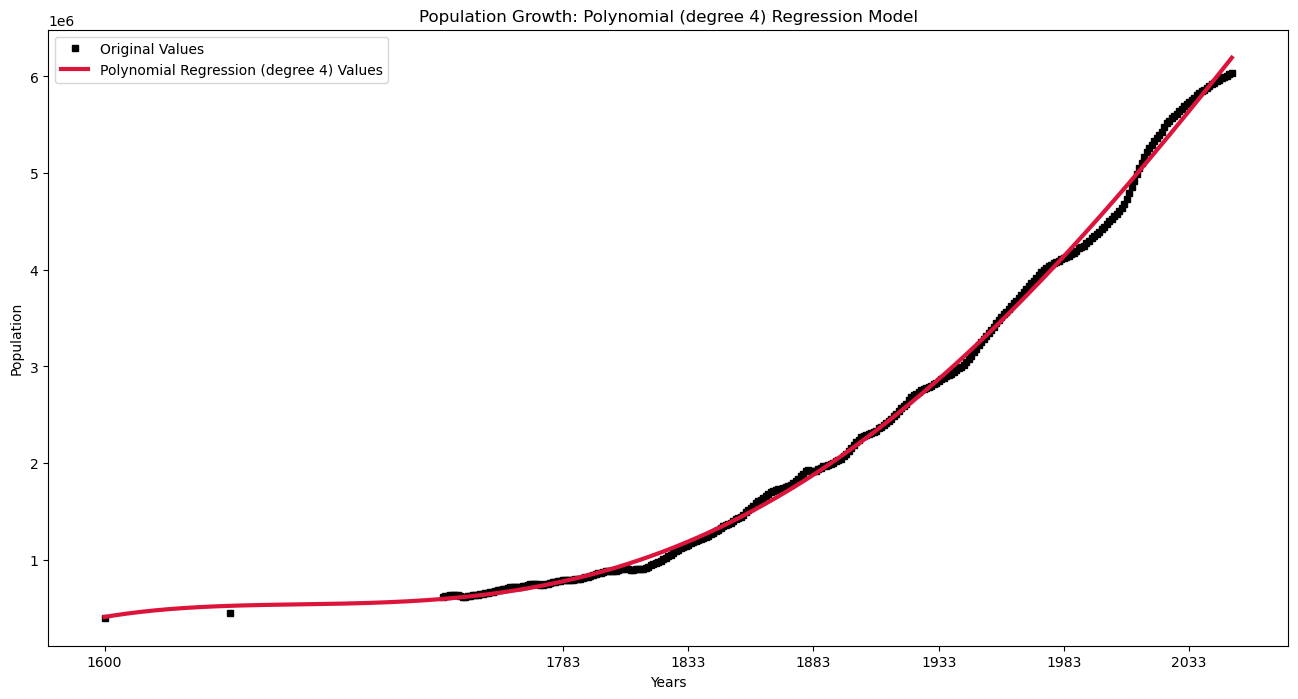

In [4]:
# Extracting the inputs (years) and outputs (population) from the data
reg_years = data['Year'].values
reg_values = data['Population'].values

# Set the range for prediction years
reg_predictor_years = np.linspace(min(reg_years), 2050, 500)

# Perform polynomial regression
degree = 4
polynomial = np.poly1d(np.polyfit(reg_years, reg_values, degree))
print(f'The polynomial our fit created is: \n{polynomial}.')

# Apply polynomial to extended values
pred_outputs = polynomial(reg_predictor_years)

# Plotting the results
fig = plt.figure(figsize=(16, 8))
plt.plot(reg_years, reg_values, 's', color='black', markersize=5, label='Original Values')
plt.plot(reg_predictor_years, pred_outputs, color='crimson', lw=3, label=f'Polynomial Regression (degree {degree}) Values')
plt.legend(loc='best')
plt.xticks(ticks=np.rint(reg_years[:len(reg_predictor_years):int(len(reg_predictor_years)/10)]))
plt.title(f'Population Growth: Polynomial (degree {degree}) Regression Model')
plt.xlabel('Years')
plt.ylabel('Population')
plt.show()

## Natural cubic splines

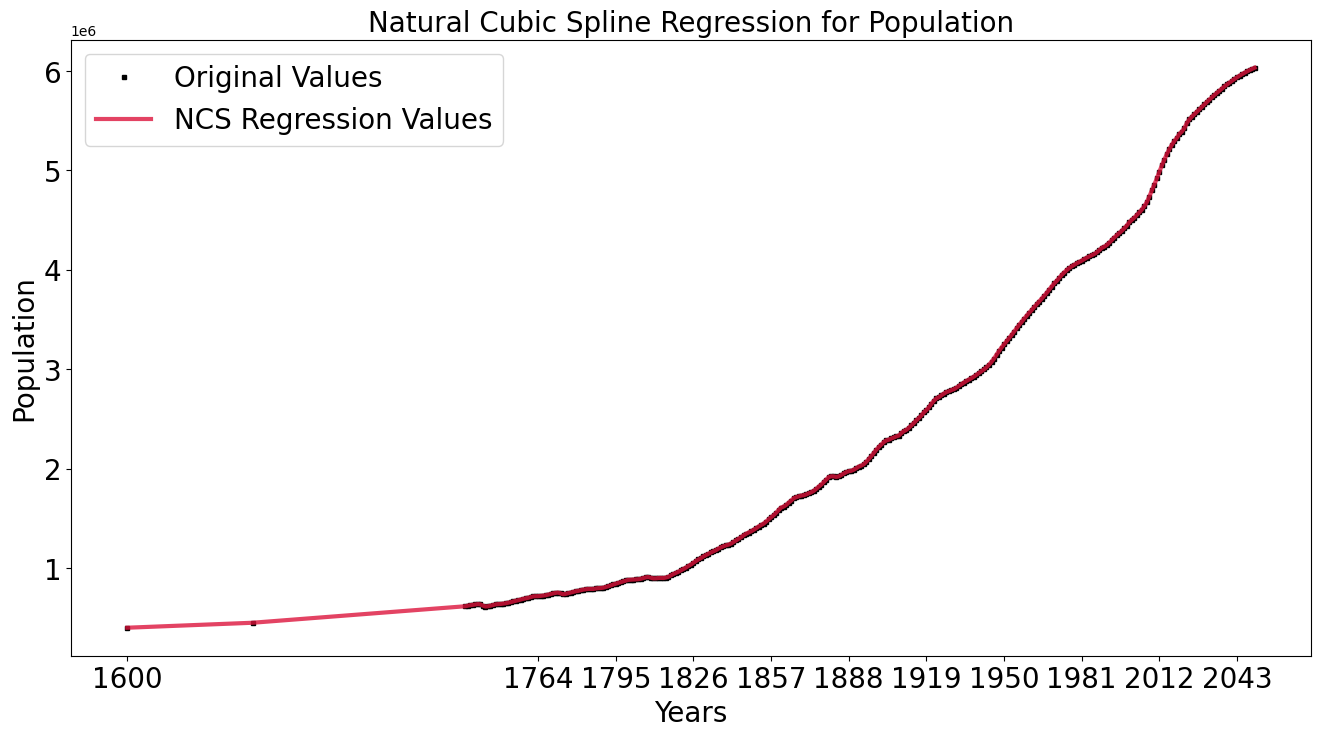

In [5]:
from scipy.interpolate import UnivariateSpline
from datetime import datetime

data = pd.read_excel(file)

# Extracting the inputs (years) and outputs (population) from the data

# Define the percentage of data to use for the spline model
perc_ncs = 100

# Calculate limits for data and predictions
limit_ncs = int(len(reg_years) * perc_ncs / 100)
limit_pred_ncs = int(len(reg_years) * (perc_ncs / 100) * 1.5)
reg_years_ncs = reg_years[:limit_ncs]
reg_values_ncs = reg_values[:limit_ncs]
reg_predictor_years_ncs = reg_years[:limit_pred_ncs]

# Fit the natural cubic spline
ncs_model = UnivariateSpline(reg_years_ncs, reg_values_ncs, k=3, s=0)

# Predicting with the model
pred_outputs = ncs_model(reg_predictor_years_ncs)




# Plotting the results
fig = plt.figure(figsize=(16, 8))
plt.plot(reg_years_ncs, reg_values_ncs, 's', color='black', markersize=3, label='Original Values')
plt.plot(reg_predictor_years_ncs, pred_outputs, color='crimson', lw=3, alpha=0.8, label='NCS Regression Values')
plt.legend(loc='best', fontsize=20)
ticks = np.rint(reg_years[:limit_pred_ncs:int(len(reg_predictor_years_ncs)/10)])
plt.xticks(ticks=ticks)
# Set font size for the numbers on the plot
plt.xticks(fontsize=20)  # Change the font size for x-axis numbers
plt.yticks(fontsize=20)  # Change the font size for y-axis numbers
plt.xlabel('Years', fontsize=20)
plt.ylabel('Population', fontsize=20)
plt.title('Natural Cubic Spline Regression for Population', fontsize=20)
plt.show()

# Plotting the results
#fig = plt.figure(figsize=(16, 8))
#plt.plot(reg_years_ncs, reg_values_ncs, 's', color='black', markersize=3, label='Original Values')
#plt.plot(reg_predictor_years_ncs, pred_outputs, color='crimson', lw=3, alpha=0.8, label='NCS Regression Values')
#plt.legend(loc='best')
#ticks = np.rint(reg_years[:limit_pred_ncs:int(len(reg_predictor_years_ncs)/10)])
#plt.xticks(ticks=ticks)
#plt.xlabel('Years')
#plt.ylabel('Population')
#plt.title('Natural Cubic Spline Regression Example')
#plt.show()

## Comparison of regressions

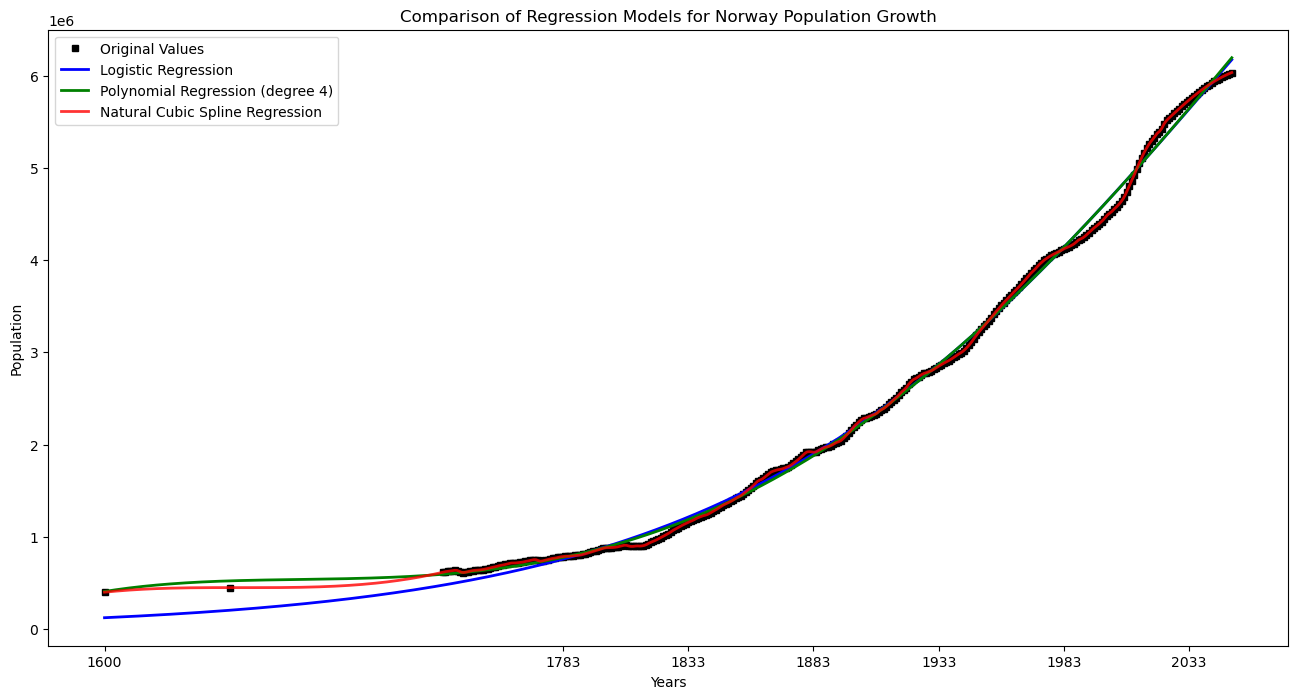

In [6]:
# Set the range for prediction years
reg_predictor_years = np.linspace(min(reg_years), 2050, 500)

# Logistic Regression
def logistic(x, C, t, tau):
    return C / (1 + np.exp(-(x - t) / tau))
initial_guess = [1.5 * max(reg_values), np.median(reg_years), (max(reg_years) - min(reg_years)) / 20]
bounds = ([0, min(reg_years), 1], [3 * max(reg_values), 2050, 100])
popt, pcov = curve_fit(logistic, reg_years, reg_values, p0=initial_guess, bounds=bounds)
logistic_pred = logistic(reg_predictor_years, *popt)

# Polynomial Regression
degree = 4
polynomial = np.poly1d(np.polyfit(reg_years, reg_values, degree))
poly_pred = polynomial(reg_predictor_years)

# Natural Cubic Spline Regression
ncs_model = UnivariateSpline(reg_years, reg_values, k=3, s=0)
ncs_pred = ncs_model(reg_predictor_years)

# Plotting the results
fig = plt.figure(figsize=(16, 8))
plt.plot(reg_years, reg_values, 's', color='black', markersize=5, label='Original Values')
plt.plot(reg_predictor_years, logistic_pred, color='blue', lw=2, label='Logistic Regression')
plt.plot(reg_predictor_years, poly_pred, color='green', lw=2, label=f'Polynomial Regression (degree {degree})')
plt.plot(reg_predictor_years, ncs_pred, color='red', lw=2, alpha=0.8, label='Natural Cubic Spline Regression')
plt.legend(loc='best')
plt.xticks(ticks=np.rint(reg_years[:len(reg_predictor_years):int(len(reg_predictor_years)/10)]))
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Comparison of Regression Models for Norway Population Growth')
plt.show()

## Since Natural cubic spline regression fits best, we export the data to the Excel file

In [7]:
# Fit the natural cubic spline
ncs_model = UnivariateSpline(reg_years_ncs, reg_values_ncs, k=3, s=0)

# Generating years from 1600 to 2050
regression_years = np.arange(1600, 2051)

# Predicting with the model for these years
regression_values = ncs_model(regression_years)

# Create a DataFrame for regression data
regression_data = pd.DataFrame({'Year': regression_years, 'Population': regression_values})

# Export the regression DataFrame to an Excel file
excel_filename = 'regression_Population.xlsx'
regression_data.to_excel(excel_filename, index=False)